In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
from textblob import TextBlob

In [6]:
from transformers import pipeline

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

Allowing multiple outputs

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Loading the dataset

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BA-ReviewAnalysis/ReviewData/reviews.csv")

Primary view of the data

In [11]:
df.head()

,Title,Review
0,"""angry, disappointed, and unsatisfied""","angry, disappointed, and unsatisfied. my ro..."
1,"""ba now stands for basic airways""","as an infrequent flyer, british airways wa..."
2,"""a totally unremarkable flight""","a totally unremarkable flight, on time, as ..."
3,“ba clearly does not care”,1. ground crew in heathrow left 60 passen...
4,"""reflect a downward trend of the airline""",london heathrow to gibraltar on 24th octob...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3612 non-null   object
 1   Review  3612 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


Combining title and review columns to facilitate sentiment analysis

In [13]:
df['Combined_Text'] = df['Title'] + " - " + df['Review']

Viewing the review without truncation

In [14]:
pd.set_option('display.max_colwidth', None)
df["Combined_Text"].head()

,Combined_Text
0,"""angry, disappointed, and unsatisfied"" - angry, disappointed, and unsatisfied. my route was from london to atlanta. my suitcase was not boarded, therefore not landed with me. for both comfort and safety reason, a bag always fly with its passenger and that did not happen. claims and few phone calls were made by desk assistants who answered my questions unprofessionally and miserably. certainly, i was left with nothing but my backpack which contained not more than few snacks. neither clothes nor anything else was ever provided as an apology. meanwhile, i was also told that my bag would have been delivered through the next 24 hours which also did not happen. british airways is a great airline to fly with but its organization, when it comes to customer service, is poor and uncertain. still waiting for my bag."
1,"""ba now stands for basic airways"" - as an infrequent flyer, british airways was always my first choice. with some reassurance and comfort of service, quality, luggage allowance etc. in fact i’ve never flown with the budget airlines. my most recent flight has now changed my view and causes me to reflect on what am i actually getting for my money and is ba what they once were. while the flights were around an hour delayed both ways, the cabin and ground staff service were ok. it is the facilities (or lack of) that i am most disappointed by. the flight was approx 4 and a half hours and the only thing offered was a half cup of water that was poured out and a bite sized banana slice of cake. in fact on my return journey i wasn’t even offered the water! to top it off ba no longer have a media screen from which you can select something to pass the time away. there wasn’t even the obligatory flight journey. the wifi was poor. i couldn’t even access the shop. however, for a fee so much more was available. this explains bas record profit of £1.52bn. so, the question is, what am i paying for? i will now for sure opt for the budget airlines. they are transparent with what they offer and what you have to pay for, which i can decide to choose or not. as ba now stands for basic airways i’ll go elsewhere and get basic for cheaper."
2,"""a totally unremarkable flight"" - a totally unremarkable flight, on time, as comfortable as european configuration goes. no catering due to the storm - effect greatly exaggerated. this was advised by email, and a euro 15 was provided - not easy to use - but lounge made up for this loss."
3,"“ba clearly does not care” - 1. ground crew in heathrow left 60 passengers luggage. we had 3 bags. 2. the heathrow ground crew left 1 of ours behind after the 1st two were received the next day. 3. the heathrow ground crew lost our 3rd bag 4 times and we were on the phone with them for over 3 hrs over the course of the week! 4. due to this, we had to spend $500 on health and beauty items for my wife on our cruise. 5. british airways said they might reimburse after 3 months. 6. we had to spend $100 in cab fare to barcelona because the bacelona ground crew (iberia) claimed they had delivered it to us. 7. heathrow ground crew made us 15 minutes late arriving back into heathrow after our cruise. we actually landed 10 minutes early, but those incompetent people still were not ready for us. 8. the heathrow ground crew caused us to leave 45 minutes late even though all passengers were boarded and ready 15 minutes before the departure time. this will probably mean we will miss our connection in anchorage. ba clearly does not care or know how to operate a ground base...shameful. ba is a joke and should be embarrassed they can't operate like a normal airline. they do not grasp the concept that even a small hiccup can cause mass ripples of chaos to other people."
4,"""reflect a downward trend of the airline"" - london heathrow to gibraltar on 24th october 2023. i shall start by reference to the booking process. i used the ba website to reserve the seat and food the website to be easy to use and clear in ever

Data preprocessing

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# Convert text to lowercase
df['Cleaned_Text'] = df['Combined_Text'].str.lower()

In [17]:
# Remove punctuation, numbers and special characters
df['Cleaned_Text'] = df['Cleaned_Text'].str.replace(r"[^a-z\s]", "", regex=True)

In [18]:
# Tokenize the words
df['Tokens'] = df['Cleaned_Text'].apply(word_tokenize)

In [19]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Tokens'] = df['Tokens'].apply(remove_stopwords)

In [20]:
# We will not lemmatize the words since we want to display the words as used in the reviews in our word cloud.

In [21]:
df['Tokens'].head()

,Tokens
0,"[angry, disappointed, unsatisfied, angry, disappointed, unsatisfied, route, london, atlanta, suitcase, boarded, therefore, landed, comfort, safety, reason, bag, always, fly, passenger, happen, claims, phone, calls, made, desk, assistants, answered, questions, unprofessionally, miserably, certainly, left, nothing, backpack, contained, snacks, neither, clothes, anything, else, ever, provided, apology, meanwhile, also, told, bag, would, delivered, next, hours, also, happen, british, airways, great, airline, fly, organization, comes, customer, service, poor, uncertain, still, waiting, bag]"
1,"[ba, stands, basic, airways, infrequent, flyer, british, airways, always, first, choice, reassurance, comfort, service, quality, luggage, allowance, etc, fact, ive, never, flown, budget, airlines, recent, flight, changed, view, causes, reflect, actually, getting, money, ba, flights, around, hour, delayed, ways, cabin, ground, staff, service, ok, facilities, lack, disappointed, flight, approx, half, hours, thing, offered, half, cup, water, poured, bite, sized, banana, slice, cake, fact, return, journey, wasnt, even, offered, water, top, ba, longer, media, screen, select, something, pass, time, away, wasnt, even, obligatory, flight, journey, wifi, poor, couldnt, even, access, shop, however, fee, much, available, explains, bas, record, profit, bn, question, ...]"
2,"[totally, unremarkable, flight, totally, unremarkable, flight, time, comfortable, european, configuration, goes, catering, due, storm, effect, greatly, exaggerated, advised, email, euro, provided, easy, use, lounge, made, loss]"
3,"[ba, clearly, care, ground, crew, heathrow, left, passengers, luggage, bags, heathrow, ground, crew, left, behind, st, two, received, next, day, heathrow, ground, crew, lost, rd, bag, times, phone, hrs, course, week, due, spend, health, beauty, items, wife, cruise, british, airways, said, might, reimburse, months, spend, cab, fare, barcelona, bacelona, ground, crew, iberia, claimed, delivered, us, heathrow, ground, crew, made, us, minutes, late, arriving, back, heathrow, cruise, actually, landed, minutes, early, incompetent, people, still, ready, us, heathrow, ground, crew, caused, us, leave, minutes, late, even, though, passengers, boarded, ready, minutes, departure, time, probably, mean, miss, connection, anchorage, ba, clearly, care, know, ...]"
4,"[reflect, downward, trend, airline, london, heathrow, gibraltar, th, october, shall, start, reference, booking, process, used, ba, website, reserve, seat, food, website, easy, use, clear, every, aspect, flight, due, depart, terminal, passengers, bussed, good, minutes, different, part, airport, aircraft, stand, boarding, flight, cabincrew, kept, low, profile, maintained, entire, flight, captain, made, brief, announcements, flight, inflight, entertainment, seats, clean, comfortable, enough, short, flight, lack, catering, overt, tiny, bottle, water, inedible, breakfast, bar, one, use, online, system, order, even, drink, course, pay, passengers, next, could, use, online, system, doe, seem, work, cabin, refused, sell, coffee, fault, moreover, usb, charge, points, work, either, given, ...]"


In [22]:
# Convert the list into a string
df['Processed_Text'] = df['Tokens'].apply(lambda x: " ".join(x))

In [23]:
# Original vs processed text
df[["Combined_Text", "Processed_Text"]].head()

,Combined_Text,Processed_Text
0,"""angry, disappointed, and unsatisfied"" - angry, disappointed, and unsatisfied. my route was from london to atlanta. my suitcase was not boarded, therefore not landed with me. for both comfort and safety reason, a bag always fly with its passenger and that did not happen. claims and few phone calls were made by desk assistants who answered my questions unprofessionally and miserably. certainly, i was left with nothing but my backpack which contained not more than few snacks. neither clothes nor anything else was ever provided as an apology. meanwhile, i was also told that my bag would have been delivered through the next 24 hours which also did not happen. british airways is a great airline to fly with but its organization, when it comes to customer service, is poor and uncertain. still waiting for my bag.",angry disappointed unsatisfied angry disappointed unsatisfied route london atlanta suitcase boarded therefore landed comfort safety reason bag always fly passenger happen claims phone calls made desk assistants answered questions unprofessionally miserably certainly left nothing backpack contained snacks neither clothes anything else ever provided apology meanwhile also told bag would delivered next hours also happen british airways great airline fly organization comes customer service poor uncertain still waiting bag
1,"""ba now stands for basic airways"" - as an infrequent flyer, british airways was always my first choice. with some reassurance and comfort of service, quality, luggage allowance etc. in fact i’ve never flown with the budget airlines. my most recent flight has now changed my view and causes me to reflect on what am i actually getting for my money and is ba what they once were. while the flights were around an hour delayed both ways, the cabin and ground staff service were ok. it is the facilities (or lack of) that i am most disappointed by. the flight was approx 4 and a half hours and the only thing offered was a half cup of water that was poured out and a bite sized banana slice of cake. in fact on my return journey i wasn’t even offered the water! to top it off ba no longer have a media screen from which you can select something to pass the time away. there wasn’t even the obligatory flight journey. the wifi was poor. i couldn’t even access the shop. however, for a fee so much more was available. this explains bas record profit of £1.52bn. so, the question is, what am i paying for? i will now for sure opt for the budget airlines. they are transparent with what they offer and what you have to pay for, which i can decide to choose or not. as ba now stands for basic airways i’ll go elsewhere and get basic for cheaper.",ba stands basic airways infrequent flyer british airways always first choice reassurance comfort service quality luggage allowance etc fact ive never flown budget airlines recent flight changed view causes reflect actually getting money ba flights around hour delayed ways cabin ground staff service ok facilities lack disappointed flight approx half hours thing offered half cup water poured bite sized banana slice cake fact return journey wasnt even offered water top ba longer media screen select something pass time away wasnt even obligatory flight journey wifi poor couldnt even access shop however fee much available explains bas record profit bn question paying sure opt budget airlines transparent offer pay decide choose ba stands basic airways ill go elsewhere get basic cheaper
2,"""a totally unremarkable flight"" - a totally unremarkable flight, on time, as comfortable as european configuration goes. no catering due to the storm - effect greatly exaggerated. this was advised by email, and a euro 15 was provided - not easy to use - but lounge made up for this loss.",totally unremarkable flight totally unremarkable flight time comfortable european configuration goes catering due storm effect greatly exaggerated advised email euro provided easy use lounge made

Performing sentiment analysis on our cleaned data

In [24]:
# 1. VADER (Valance aware dictionary and sentiment reasoner)
# Since this tool is built specifically for sentiment analysis of social media texts, this will be our first choice.

nltk.download('vader_lexicon')

df["Vader_Sentiment"] = df["Processed_Text"].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [25]:
df[["Processed_Text", "Vader_Sentiment"]]

,Processed_Text,Vader_Sentiment
0,angry disappointed unsatisfied angry disappointed unsatisfied route london atlanta suitcase boarded therefore landed comfort safety reason bag always fly passenger happen claims phone calls made desk assistants answered questions unprofessionally miserably certainly left nothing backpack contained snacks neither clothes anything else ever provided apology meanwhile also told bag would delivered next hours also happen british airways great airline fly organization comes customer service poor uncertain still waiting bag,-0.9274
1,ba stands basic airways infrequent flyer british airways always first choice reassurance comfort service quality luggage allowance etc fact ive never flown budget airlines recent flight changed view causes reflect actually getting money ba flights around hour delayed ways cabin ground staff service ok facilities lack disappointed flight approx half hours thing offered half cup water poured bite sized banana slice cake fact return journey wasnt even offered water top ba longer media screen select something pass time away wasnt even obligatory flight journey wifi poor couldnt even access shop however fee much available explains bas record profit bn question paying sure opt budget airlines transparent offer pay decide choose ba stands basic airways ill go elsewhere get basic cheaper,-0.1027
2,totally unremarkable flight totally unremarkable flight time comfortable european configuration goes catering due storm effect greatly exaggerated advised email euro provided easy use lounge made loss,0.4951
3,ba clearly care ground crew heathrow left passengers luggage bags heathrow ground crew left behind st two received next day heathrow ground crew lost rd bag times phone hrs course week due spend health beauty items wife cruise british airways said might reimburse months spend cab fare barcelona bacelona ground crew iberia claimed delivered us heathrow ground crew made us minutes late arriving back heathrow cruise actually landed minutes early incompetent people still ready us heathrow ground crew caused us leave minutes late even though passengers boarded ready minutes departure time probably mean miss connection anchorage ba clearly care know operate ground baseshameful ba joke embarrassed cant operate like normal airline grasp concept even small hiccup cause mass ripples chaos people,0.8069
4,reflect downward trend airline london heathrow gibraltar th october shall start reference booking process used ba website reserve seat food website easy use clear every aspect flight due depart terminal passengers bussed good minutes different part airport aircraft stand boarding flight cabincrew kept low profile maintained entire flight captain made brief announcements flight inflight entertainment seats clean comfortable enough short flight lack catering overt tiny bottle water inedible breakfast bar one use online system order even drink course pay passengers next could use online system doe seem work cabin refused sell coffee fault moreover usb charge points work either given early hour flight poor show even sale items available trolley service system ba place good enough flight arrived ontime disembarkation inefficient though poorly managed crew seen crew wearing new ba uniform seems reflect downward trend airline candid difference ba service socalled budget rivals route ba monopoly option use services different company,0.8074
...,...,...
3607,british airways customer review lhrhkg boeing much written tired old fleet wont go annoying rows front world traveller cabin time crew got row serve lunch choices already run would ok perfectly acceptable pasta starter pasta salad sensible offering dishes almost crew required serve drinks food didnt see hours breakfast served flew home new club world see separate review advice would fly best cabin afford hour flight really worthwhile,0.9319
3608,british airways customer review lhr ham purser addresses club passengers name boarding little late l

In [26]:
# 2. TextBlob (A general toolkit for NLP tasks)

df["TextBlob_Sentiment"] = df["Processed_Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [27]:
df[["Processed_Text","TextBlob_Sentiment"]]

,Processed_Text,TextBlob_Sentiment
0,angry disappointed unsatisfied angry disappointed unsatisfied route london atlanta suitcase boarded therefore landed comfort safety reason bag always fly passenger happen claims phone calls made desk assistants answered questions unprofessionally miserably certainly left nothing backpack contained snacks neither clothes anything else ever provided apology meanwhile also told bag would delivered next hours also happen british airways great airline fly organization comes customer service poor uncertain still waiting bag,-0.045455
1,ba stands basic airways infrequent flyer british airways always first choice reassurance comfort service quality luggage allowance etc fact ive never flown budget airlines recent flight changed view causes reflect actually getting money ba flights around hour delayed ways cabin ground staff service ok facilities lack disappointed flight approx half hours thing offered half cup water poured bite sized banana slice cake fact return journey wasnt even offered water top ba longer media screen select something pass time away wasnt even obligatory flight journey wifi poor couldnt even access shop however fee much available explains bas record profit bn question paying sure opt budget airlines transparent offer pay decide choose ba stands basic airways ill go elsewhere get basic cheaper,0.010417
2,totally unremarkable flight totally unremarkable flight time comfortable european configuration goes catering due storm effect greatly exaggerated advised email euro provided easy use lounge made loss,0.029762
3,ba clearly care ground crew heathrow left passengers luggage bags heathrow ground crew left behind st two received next day heathrow ground crew lost rd bag times phone hrs course week due spend health beauty items wife cruise british airways said might reimburse months spend cab fare barcelona bacelona ground crew iberia claimed delivered us heathrow ground crew made us minutes late arriving back heathrow cruise actually landed minutes early incompetent people still ready us heathrow ground crew caused us leave minutes late even though passengers boarded ready minutes departure time probably mean miss connection anchorage ba clearly care know operate ground baseshameful ba joke embarrassed cant operate like normal airline grasp concept even small hiccup cause mass ripples chaos people,-0.062500
4,reflect downward trend airline london heathrow gibraltar th october shall start reference booking process used ba website reserve seat food website easy use clear every aspect flight due depart terminal passengers bussed good minutes different part airport aircraft stand boarding flight cabincrew kept low profile maintained entire flight captain made brief announcements flight inflight entertainment seats clean comfortable enough short flight lack catering overt tiny bottle water inedible breakfast bar one use online system order even drink course pay passengers next could use online system doe seem work cabin refused sell coffee fault moreover usb charge points work either given early hour flight poor show even sale items available trolley service system ba place good enough flight arrived ontime disembarkation inefficient though poorly managed crew seen crew wearing new ba uniform seems reflect downward trend airline candid difference ba service socalled budget rivals route ba monopoly option use services different company,0.130929
...,...,...
3607,british airways customer review lhrhkg boeing much written tired old fleet wont go annoying rows front world traveller cabin time crew got row serve lunch choices already run would ok perfectly acceptable pasta starter pasta salad sensible offering dishes almost crew required serve drinks food didnt see hours breakfast served flew home new club world see separate review advice would fly best cabin afford hour flight really worthwhile,0.276033
3608,british airways customer review lhr ham purser addresses club passengers name boardin

In [28]:
# 3. Sentiment analysis using BERT

sentiment_model = pipeline("sentiment-analysis")

def bert_sentiment(text):
  result = sentiment_model(text)[0]
  label = result["label"]
  score = result["score"]

  if label == "POSITIVE":
    return score
  elif label == "NEGATIVE":
    return -score
  else:
    return 0

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [29]:
df["BERT_Sentiment"] = df["Processed_Text"].apply(bert_sentiment)

In [30]:
df[["Processed_Text","BERT_Sentiment"]]

,Processed_Text,BERT_Sentiment
0,angry disappointed unsatisfied angry disappointed unsatisfied route london atlanta suitcase boarded therefore landed comfort safety reason bag always fly passenger happen claims phone calls made desk assistants answered questions unprofessionally miserably certainly left nothing backpack contained snacks neither clothes anything else ever provided apology meanwhile also told bag would delivered next hours also happen british airways great airline fly organization comes customer service poor uncertain still waiting bag,-0.998738
1,ba stands basic airways infrequent flyer british airways always first choice reassurance comfort service quality luggage allowance etc fact ive never flown budget airlines recent flight changed view causes reflect actually getting money ba flights around hour delayed ways cabin ground staff service ok facilities lack disappointed flight approx half hours thing offered half cup water poured bite sized banana slice cake fact return journey wasnt even offered water top ba longer media screen select something pass time away wasnt even obligatory flight journey wifi poor couldnt even access shop however fee much available explains bas record profit bn question paying sure opt budget airlines transparent offer pay decide choose ba stands basic airways ill go elsewhere get basic cheaper,-0.994477
2,totally unremarkable flight totally unremarkable flight time comfortable european configuration goes catering due storm effect greatly exaggerated advised email euro provided easy use lounge made loss,-0.990312
3,ba clearly care ground crew heathrow left passengers luggage bags heathrow ground crew left behind st two received next day heathrow ground crew lost rd bag times phone hrs course week due spend health beauty items wife cruise british airways said might reimburse months spend cab fare barcelona bacelona ground crew iberia claimed delivered us heathrow ground crew made us minutes late arriving back heathrow cruise actually landed minutes early incompetent people still ready us heathrow ground crew caused us leave minutes late even though passengers boarded ready minutes departure time probably mean miss connection anchorage ba clearly care know operate ground baseshameful ba joke embarrassed cant operate like normal airline grasp concept even small hiccup cause mass ripples chaos people,-0.996754
4,reflect downward trend airline london heathrow gibraltar th october shall start reference booking process used ba website reserve seat food website easy use clear every aspect flight due depart terminal passengers bussed good minutes different part airport aircraft stand boarding flight cabincrew kept low profile maintained entire flight captain made brief announcements flight inflight entertainment seats clean comfortable enough short flight lack catering overt tiny bottle water inedible breakfast bar one use online system order even drink course pay passengers next could use online system doe seem work cabin refused sell coffee fault moreover usb charge points work either given early hour flight poor show even sale items available trolley service system ba place good enough flight arrived ontime disembarkation inefficient though poorly managed crew seen crew wearing new ba uniform seems reflect downward trend airline candid difference ba service socalled budget rivals route ba monopoly option use services different company,-0.993355
...,...,...
3607,british airways customer review lhrhkg boeing much written tired old fleet wont go annoying rows front world traveller cabin time crew got row serve lunch choices already run would ok perfectly acceptable pasta starter pasta salad sensible offering dishes almost crew required serve drinks food didnt see hours breakfast served flew home new club world see separate review advice would fly best cabin afford hour flight really worthwhile,-0.974755
3608,british airways customer review lhr ham purser addresses club passengers name boardin

In [31]:
# Save updated dataset to csv
df.to_csv("sentiment_analysis_results.csv", index=False)

Visualisation

In [32]:
# WordCloud
# Join all preprocessed text into a single string
text = " ".join(df['Processed_Text'])

<Figure size 1000x500 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

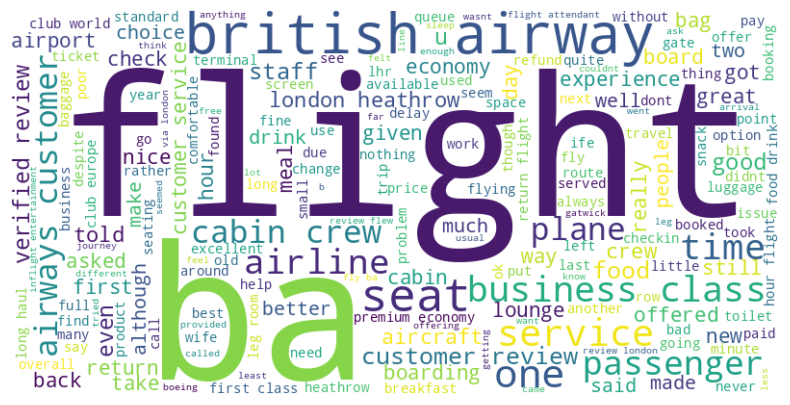

In [33]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [34]:
# We get no meaningful insights from the wordcloud, so we will look at other visualisations-

(array([ 320.,  257.,  160.,  125.,   86.,   84.,   59.,   64.,   53.,
          73.,   39.,   64.,   66.,   58.,   97.,   91.,  127.,  206.,
         343., 1240.]),
 array([-0.9944  , -0.894765, -0.79513 , -0.695495, -0.59586 , -0.496225,
        -0.39659 , -0.296955, -0.19732 , -0.097685,  0.00195 ,  0.101585,
         0.20122 ,  0.300855,  0.40049 ,  0.500125,  0.59976 ,  0.699395,
         0.79903 ,  0.898665,  0.9983  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Sentiment Scores (VADER)')

Text(0.5, 0, 'Sentiment Score (-1 to 1)')

Text(0, 0.5, 'Frequency')

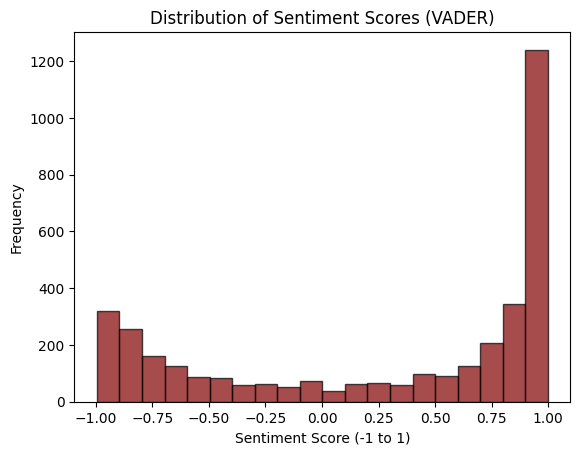

In [35]:
# Histogram of Vader sentiment scores
plt.hist(df['Vader_Sentiment'], bins=20, color='maroon', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiment Scores (VADER)")
plt.xlabel("Sentiment Score (-1 to 1)")
plt.ylabel("Frequency")
plt.show()

(array([  1.,   1.,   1.,   3.,   4.,  14.,  31.,  48., 118., 266., 539.,
        699., 710., 505., 351., 204.,  75.,  25.,  12.,   5.]),
 array([-1.  , -0.91, -0.82, -0.73, -0.64, -0.55, -0.46, -0.37, -0.28,
        -0.19, -0.1 , -0.01,  0.08,  0.17,  0.26,  0.35,  0.44,  0.53,
         0.62,  0.71,  0.8 ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Sentiment Scores (TextBlob)')

Text(0.5, 0, 'Sentiment Score (-1 to 1)')

Text(0, 0.5, 'Frequency')

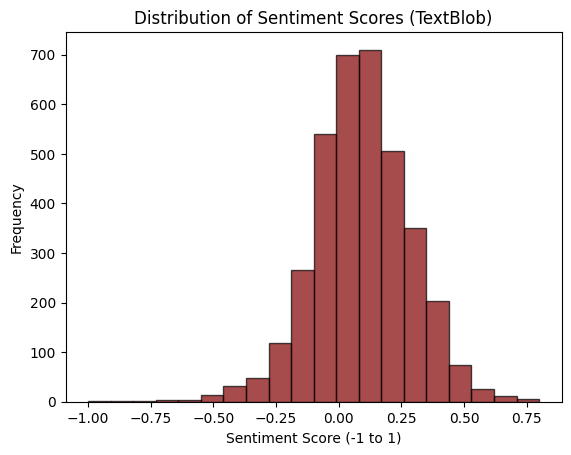

In [36]:
# Histogram of TextBlob sentiment scores
plt.hist(df['TextBlob_Sentiment'], bins=20, color='maroon', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiment Scores (TextBlob)")
plt.xlabel("Sentiment Score (-1 to 1)")
plt.ylabel("Frequency")
plt.show()

(array([2643.,   66.,   36.,   25.,   28.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   30.,   23.,   39.,
          64.,  658.]),
 array([-9.99784529e-01, -8.99801788e-01, -7.99819046e-01, -6.99836305e-01,
        -5.99853563e-01, -4.99870822e-01, -3.99888080e-01, -2.99905339e-01,
        -1.99922597e-01, -9.99398559e-02,  4.28855419e-05,  1.00025627e-01,
         2.00008368e-01,  2.99991110e-01,  3.99973851e-01,  4.99956593e-01,
         5.99939334e-01,  6.99922076e-01,  7.99904817e-01,  8.99887559e-01,
         9.99870300e-01]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Distribution of Sentiment Scores (BERT)')

Text(0.5, 0, 'Sentiment Score (-1 to 1)')

Text(0, 0.5, 'Frequency')

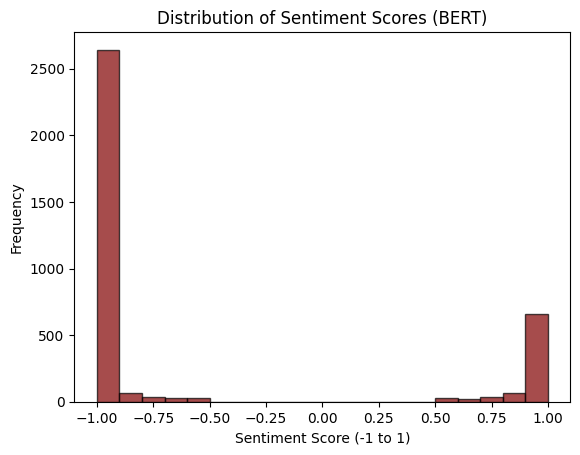

In [37]:
# Histogram of BERT sentiment scores
plt.hist(df['BERT_Sentiment'], bins=20, color='maroon', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiment Scores (BERT)")
plt.xlabel("Sentiment Score (-1 to 1)")
plt.ylabel("Frequency")
plt.show()

In [38]:
correlation = df[['Vader_Sentiment', 'TextBlob_Sentiment', 'BERT_Sentiment']].corr()
correlation

,Vader_Sentiment,TextBlob_Sentiment,BERT_Sentiment
Vader_Sentiment,1.000000,0.689713,0.473199
TextBlob_Sentiment,0.689713,1.000000,0.580758
BERT_Sentiment,0.473199,0.580758,1.000000


<Axes: >

Text(0.5, 1.0, 'Correlation Between Sentiment Scores')

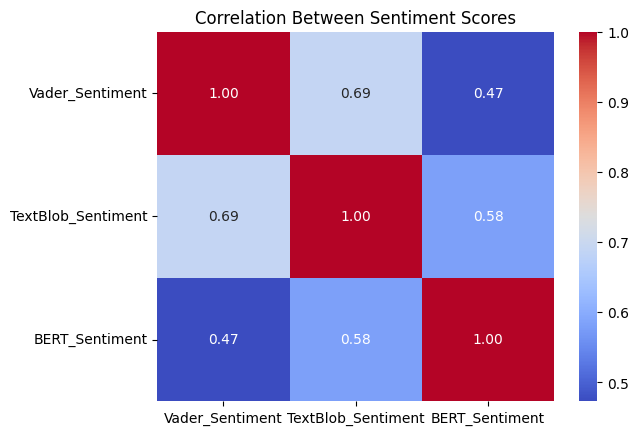

In [39]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sentiment Scores")
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Sentiment Scores: VADER vs. BERT')

Text(0.5, 0, 'VADER Sentiment Score (-1 to 1)')

Text(0, 0.5, 'BERT Sentiment Score (-1 to 1)')

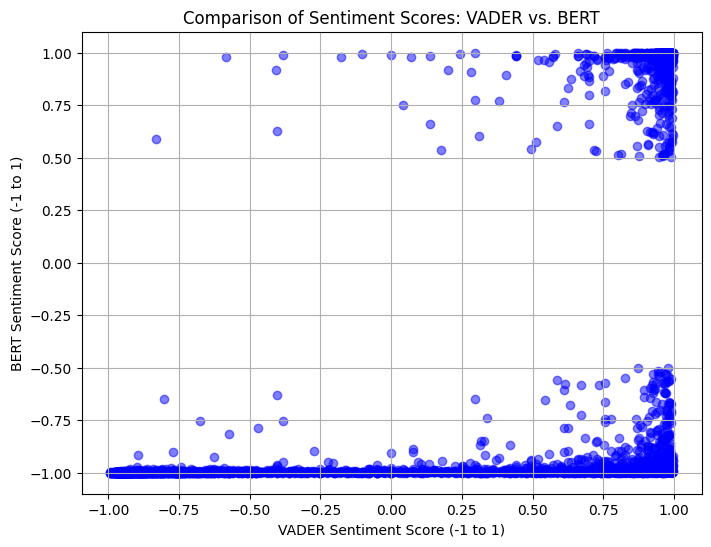

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Sentiment Scores: VADER vs. TextBlob')

Text(0.5, 0, 'VADER Sentiment Score (-1 to 1)')

Text(0, 0.5, 'TextBlob Sentiment Score (-1 to 1)')

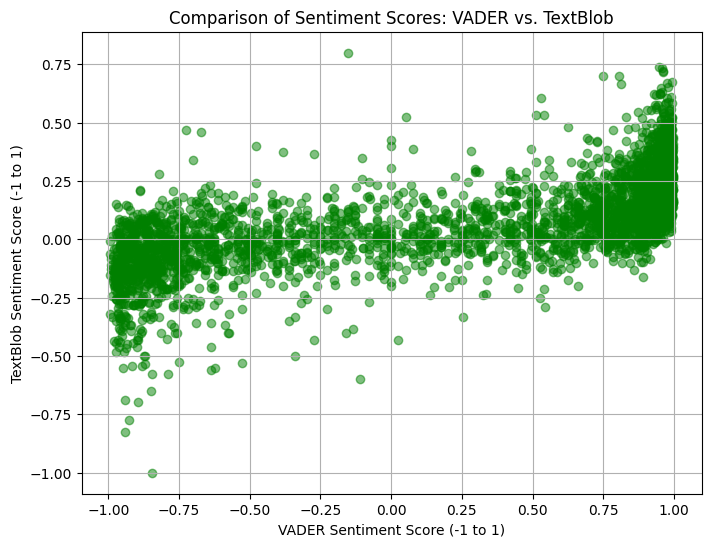

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Sentiment Scores: BERT vs. TextBlob')

Text(0.5, 0, 'BERT Sentiment Score (-1 to 1)')

Text(0, 0.5, 'TextBlob Sentiment Score (-1 to 1)')

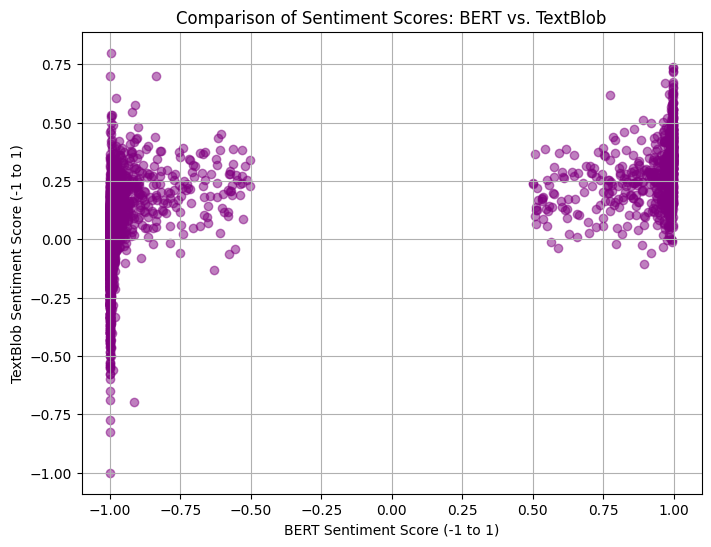

In [40]:
import matplotlib.pyplot as plt

# Scatter plot comparing VADER and BERT
plt.figure(figsize=(8, 6))
plt.scatter(df['Vader_Sentiment'], df['BERT_Sentiment'], alpha=0.5, color='blue', label='VADER vs. BERT')
plt.title("Comparison of Sentiment Scores: VADER vs. BERT")
plt.xlabel("VADER Sentiment Score (-1 to 1)")
plt.ylabel("BERT Sentiment Score (-1 to 1)")
plt.grid(True)
plt.show()

# Scatter plot comparing VADER and TextBlob
plt.figure(figsize=(8, 6))
plt.scatter(df['Vader_Sentiment'], df['TextBlob_Sentiment'], alpha=0.5, color='green', label='VADER vs. TextBlob')
plt.title("Comparison of Sentiment Scores: VADER vs. TextBlob")
plt.xlabel("VADER Sentiment Score (-1 to 1)")
plt.ylabel("TextBlob Sentiment Score (-1 to 1)")
plt.grid(True)
plt.show()

# Scatter plot comparing BERT and TextBlob
plt.figure(figsize=(8, 6))
plt.scatter(df['BERT_Sentiment'], df['TextBlob_Sentiment'], alpha=0.5, color='purple', label='BERT vs. TextBlob')
plt.title("Comparison of Sentiment Scores: BERT vs. TextBlob")
plt.xlabel("BERT Sentiment Score (-1 to 1)")
plt.ylabel("TextBlob Sentiment Score (-1 to 1)")
plt.grid(True)
plt.show()


In [43]:
# Improving the word cloud
# 1. Take the top 30% of reviews from the negative and positive classified reviews from the BERT model.
# 2. Remove words that dont provide much insights
# 3. Create wordcloud

df["BERT_Sentiment"].head()

,BERT_Sentiment
0,-0.998738
1,-0.994477
2,-0.990312
3,-0.996754
4,-0.993355


In [46]:
sorted_df = df.sort_values(by="BERT_Sentiment", ascending=False)
sorted_df[["Review","BERT_Sentiment"]]

,Review,BERT_Sentiment
894,"london to calgary. thank you to james, a club world flight attendant on ba 0103 april 15, 2019. his service was impeccable, attentive and delightful. i thoroughly enjoyed the flight.",0.999870
954,london to chennai. it was amazing. the crew were very friendly. the food was amazing and the seats were comfortable. t was overall an amazing flight and i enjoyed it thoroughly.,0.999857
497,the service was excellent. the cabin staff were attentive and efficient. the food and drinks were very good. the seat in the new suites is extremely comfortable and the additional privacy is really nice. overall a very enjoyable flight.,0.999850
2898,"fantastic from the word go. check in was great, concorde lounge great along with the spa elemis treatment which was lovely. good service and attention to detail. crew onboard delightful. food was nice and was a real pleasure.",0.999848
1071,"london heathrow to miami. the airport staff was very helpful, the crew was also very nice and the food was delicious. i had the old personal entertainment system but it works very well. overall it was one of the best flights i had.",0.999835
...,...,...
1020,"antigua to gatwick. one of the worst business class experience. entertainment system didn't work and asked the crew for solution and their reply was sorry sir there is no solution. service super slow 2-3 crew to serve 48 business class passengers. food bad, beef over cooked, mashed potatoes dry and salad disgusting. nobody from the crew to help us to prepare our bed. woke up 20min before landing and offered a yogurt.",-0.999753
1786,verified review i am due to fly from tehran to vancouver via london heathrow. i pre-paid for my seat and their system assigned a wrong seat. i called customer service 6 times and no one helped me the get this fixed. british airways customer service is the worst airline customer service i've seen. i would be happy to pay extra next time not to travel with british airways.,-0.999756
812,"mykonos to london flight delayed and waiting to depart. they are not on time, be prepared to miss your connections, take off 2 hours late,. the staff is some of the worst i have had on airlines. you may be stuck on the runway and they won’t offer you any water. the worst business class experience i have had.",-0.999757
820,"stockholm to london. worst business class flight i have flown. split seating for myself and my wife because apparently they were overbooked. the meal was inedible for me, and was the worst airline meal i have been served.",-0.999767


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               3612 non-null   object 
 1   Review              3612 non-null   object 
 2   Combined_Text       3612 non-null   object 
 3   Cleaned_Text        3612 non-null   object 
 4   Tokens              3612 non-null   object 
 5   Processed_Text      3612 non-null   object 
 6   Vader_Sentiment     3612 non-null   float64
 7   TextBlob_Sentiment  3612 non-null   float64
 8   BERT_Sentiment      3612 non-null   float64
dtypes: float64(3), object(6)
memory usage: 254.1+ KB


In [51]:
positive_reviews = sorted_df['Cleaned_Text'].head(1000)
positive_reviews

,Cleaned_Text
894,impeccable attentive and delightful london to calgary thank you to james a club world flight attendant on ba april his service was impeccable attentive and delightful i thoroughly enjoyed the flight
954,crew were very friendly london to chennai it was amazing the crew were very friendly the food was amazing and the seats were comfortable t was overall an amazing flight and i enjoyed it thoroughly
497,overall a very enjoyable flight the service was excellent the cabin staff were attentive and efficient the food and drinks were very good the seat in the new suites is extremely comfortable and the additional privacy is really nice overall a very enjoyable flight
2898,british airways customer review fantastic from the word go check in was great concorde lounge great along with the spa elemis treatment which was lovely good service and attention to detail crew onboard delightful food was nice and was a real pleasure
1071,crew was also very nice london heathrow to miami the airport staff was very helpful the crew was also very nice and the food was delicious i had the old personal entertainment system but it works very well overall it was one of the best flights i had
...,...
3308,british airways customer review i travelled to hong kong with british airways from heathrow on a outbound and one of their new as on the way back both in world traveller it had been a long time since i had travelled with ba years but it was one of my better flying experiences i didnt know what to expect this time round but the seats had plenty of leg room on the on the way out i was annoyed as i was told to pull my window blind down as other people were sleeping although i had specifically asked for the window seat for a reason however the crew were great and asked if id like to look out of the window by the jump seat which i did for a good few hours not only that the crew called the flight crew and the copilot walked to the back of the plane to have a chat with me and gave me a map with all the points of interest highlighted with the times we would be above them airlines dont have to spend any money to truly satisfy passengers the seat on the was quite comfortable and the ife had plenty of selection the food was good not dried out and it was tasty all the toilets were operational and were clean on the way back i was upstairs on the a the aircraft was extremely clean comfortable and the a was ever so quiet in all areas of the flight which really surprised me i really loved the seat locker next to my window seat which easily fitted the contents of my hand luggage food was good again and the crew were again amazing allowing me to visit the flight deck after the flight had safely arrived at heathrow toilets were clean and tody and all operational and the ife was good leg room was good the only thing i would say is that the ife does take up a lot of space under the seat meaning that hand luggage cannot really be stored there and it can get in the way of your feet
2651,a pleasant flight british airways class boeing is used on this flight to bangkok i was seated in d which is a bulkhead seat on the aisle behind the premium economy cabin i like the fact that ba still have seat layout on the b in economy while many airlines are using xx lay out i had plenty of legroom and on this particular flight i had the best sleep meals were average certainly not bad cabin crew kind and professional all in all a pleasant flight
251,flight perfectly on time old a with narrow pitch flight perfectly on time with constant announcements from cockpit friendly staff free chips and water quick luggage delivery at t
1552,preselected seats retained verified review gatwick to mauritius in business class the check in and lounge were of a reasonable standard and the new lounge at gatwick is nice boarding was fine and preselected seats retained the layout and features were standard of club world and service of the level expected the club kitchen was fairly limited in its o

In [53]:
negative_reviews = sorted_df['Cleaned_Text'].tail(1000)
negative_reviews

,Cleaned_Text
3151,british airways customer review i have used british airways over a number of years for work and leisure trips nonexclusively and must say i have noted a gradual but continued decrease in service quality on a recent return flight from johannesburg travelling with an infant we were delayed for over hours the way in which the delay was handled was terrible minimal staff meant it took three plus hours to get checked in to a hotel then trying to arrange the return minimising waiting time for the little one took hours with two staff serving passengers with no concern for customers tried calling head office and they were less helpful than the booking agentsmy intention is to avoid where possible and in many cases they are cheaper alternatives
566,total rip off total rip off british airways cancels flights due to pandemic covid when i use the voucher they issued me they want me to pay a additional for a first class seat british airways way to rip people off and profit from a world pandemic
1311,staff attitude so nonchalant johannesburg to london awful pathetic service and staff attitude so nonchalant my seat area was absolutely filthy when i asked the stewardess to assist she looked at me like i was such a nuisance made clicking sounds and picked up some fruit peels nuts and piece of paper between am in the morning i went in search of snacks found the cabin staff in the kitchen area when i asked please may i have some snacks i was told to get it myself from the side counter and the staff continued with their conversation not one them got up to assist not one of them had replaced any of the snacks the counter was empty only about crisps available and chocs they kept serving the person next to me over me instead of going around me didnt matter that they blocked my viewing that is fine and understandable but no excuse me please can we nothing rudeness at its best if you asked anything the stewardess made it look like an absolute chore and made one feel like you were being a burden
3136,british airways customer review ba th jan london heathrow to austin legroom in economy is too small im and just dont fit on a long haul flight recently i sat with my knees sticking out into the aisle and adjacent seat space for hours
2745,supposed legacy airline thoroughly disappointed with this supposed legacy airline having been delayed for an hour on my british airways connecting flight to lhr and stuck overnight at a heathrow hotel i was looking forward to getting going on the morning flight reality check this aircraft is old and decrepit and was built in the s it should have been retired long ago a quick google search shows that this aircraft makes up the majority of bas longhaul fleet the seats are so small and narrow that you are constantly playing elbow hockey with the people on either side of you i am ft and weigh kg so how a larger person might survive is beyond me everything is old and looks it too even the staff the seats are worn to the point that you can feel every piece of the metal frame beneath in fact the lady seated in front of me complained to the cabin crew because she could feel the miniature tropicana bottle i had put the seat pocket even the safety animation video looks like it was made as a school it project by year olds staff are cold and unfriendly it would seem that their contracts forbid smiling of any kind the inflight entertainment screens are smaller than a regular smartphone and have large visible pixels it is a struggle to actually see what is being displayed they are running on brand image only and even then theres only fumes left in tank do not fly ba at least until they seriously upgrade their fleet
...,...
1020,worst business class antigua to gatwick one of the worst business class experience entertainment system didnt work and asked the crew for solution and their reply was sorry sir there is no solution service super slow crew to serve business class passengers food bad beef over cooked mashed pota

In [ ]:
sia = SentimentIntensityAnalyzer()

positive = "".join(positive_reviews).split(" ")
negative = "".join(negative_reviews).split(" ")

positive_words = []
negative_words = []

for word in positive + negative:
  if sia.polarity_scores(word)["compound"] > 0:
    positive_words.append(word)
  elif sia.polarity_scores(word)["compound"] < 0:
    negative_words.append(word)


<Figure size 1000x500 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

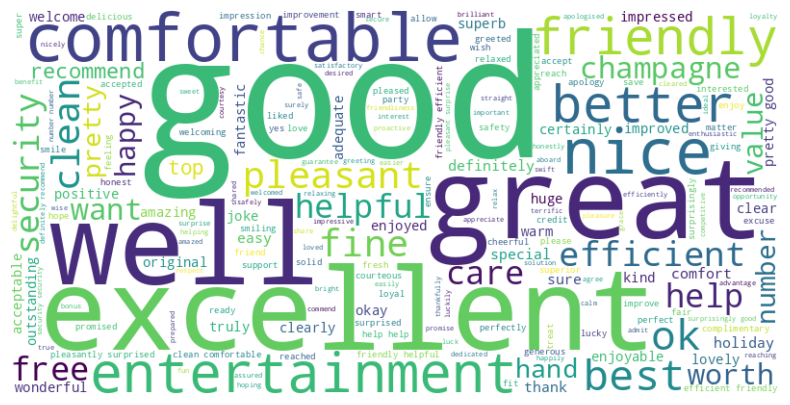

In [74]:
# Word cloud for positive reviews

text = " ".join(positive_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

<Figure size 1000x500 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

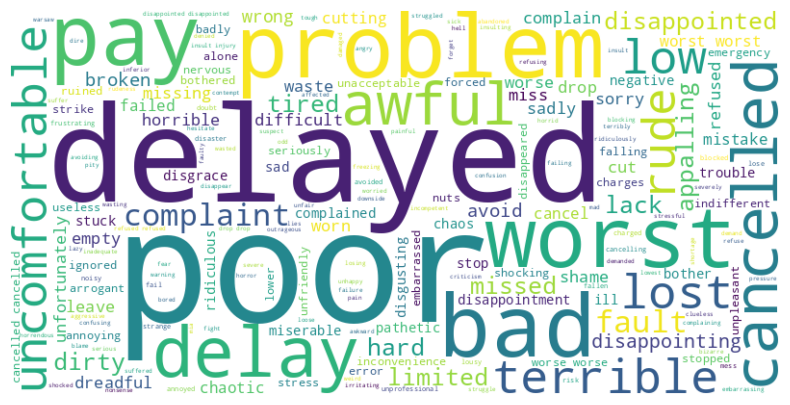

In [75]:
# Word cloud for negative reviews

text = " ".join(negative_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')